## Exercise on Machine Learning 101 - Part 2
---
Instructions are given in <span style="color:blue">blue</span> color.



##### Created by:
##### Tomislav Tomov 6003618
##### Ioana Stoicescu 6003487

In this exercise, you will work with decision trees to (hopefully) further improve the classification results we got during the CRISP-DM lecture notes.

* <div style="color:blue">This week's material included an article by Pedro Domingos in which he gave a brief insight into the domain of Machine Learning. One of the papers' sections mentioned the usage of so-called <b>model ensembles</b>. Go back to the article, find the three techniques used for ensemble methods, as stated by Domingos, and cite his description for each one here.</div>

*Your solution goes here:*


Remember that email you send to your social worker friend? The one where you told him that you possibly need more data to get improved results out of your model? Well, he replied and stated that, unfortunately, there isn't any more data he could provide to you.
It seems there is nothing left you can do but to go back to the drawing board for the second iteration of your modeling phase.

* <div style="color:blue">The folder <code>/data</code>, next to this exercise, contains the file <code>Student_Survey.csv</code>. Read the data into a <code>DataFrame</code> and make sure to import any necessary libraries, too.</div>

In [305]:
# Libraries:
import numpy as np
import pandas as pd

data = pd.read_csv("./data/Student_Survey.csv")

# we can also show the amount of samples and columns
print(data.head())

  sex  age address famsize Pstatus     Mjob      Fjob  studytime  failures  \
0   F   18       U     GT3       A  at_home   teacher          2         0   
1   F   17       U     GT3       T  at_home     other          2         0   
2   F   15       U     LE3       T  at_home     other          2         3   
3   F   15       U     GT3       T   health  services          3         0   
4   F   16       U     GT3       T    other     other          2         0   

  activities  ... famrel freetime goout Dalc  Walc  health  absences  G1  G2  \
0         no  ...      4        3     4    1     1       3         6   5   6   
1         no  ...      5        3     3    1     1       3         4   5   5   
2         no  ...      4        3     2    2     3       3        10   7   8   
3        yes  ...      3        2     2    1     1       5         2  15  14   
4         no  ...      4        3     2    1     2       5         4   6  10   

   G3  
0   6  
1   6  
2  10  
3  15  
4  10  

[

The following is needed for **reproducibility** (see [here](https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/), but also [here](https://scikit-learn.org/stable/faq.html#how-do-i-set-a-random-state-for-an-entire-execution)):

In [308]:
np.random.seed(42)
RSEED = 42
np.random.seed(RSEED)


In [310]:
import numpy as np
from scipy.stats import norm

print('Without seed')
print(norm.rvs(10, size = 4))
print(norm.rvs(10, size = 4))

print('With the same seed')
np.random.seed(42)
print(norm.rvs(10, size = 4))
np.random.seed(42) # reset the random seed back to 42
print(norm.rvs(10, size = 4))

print('Without seed')
np.random.seed(None)
print(norm.rvs(10, size = 4))
print(norm.rvs(10, size = 4))

Without seed
[10.49671415  9.8617357  10.64768854 11.52302986]
[ 9.76584663  9.76586304 11.57921282 10.76743473]
With the same seed
[10.49671415  9.8617357  10.64768854 11.52302986]
[10.49671415  9.8617357  10.64768854 11.52302986]
Without seed
[11.47402845  9.4843798   9.93211866 10.63907642]
[ 8.443523   10.24290282 10.19171778  8.98428159]


* <div style="color:blue">Remove the columns <code>G1</code>, <code>G2</code>, <code>G3</code>, and <code>Walc</code> from your <code>DataFrame</code>.</div>

In [313]:
data.drop(['G1', 'G2', 'G3', 'Walc'], axis=1, inplace=True)


* <div style="color:blue">Replace all categorical values in your <code>DataFrame</code> with numerical data - using an appropriate method.</div>

In [316]:
from sklearn.preprocessing import OrdinalEncoder

# Create an encoder instance
encoder = OrdinalEncoder()

# Create a list that holds columns with categorical data
oe_columns = ["sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "activities", "nursery", "higher", "internet", "romantic"]

# Retrieve the categories from those columns
encoder.fit(data[oe_columns])

# Map the categories to numerical data in the original data frame
data[oe_columns] = encoder.transform(data[oe_columns])

encoder.categories_
#print(data.columns)

[array(['F', 'M'], dtype=object),
 array(['R', 'U'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [318]:
# Invert the transformation to retrieve the original categorical values from a column
pd.DataFrame(encoder.inverse_transform(data[oe_columns]), columns=oe_columns).famsize.head()

0    GT3
1    GT3
2    LE3
3    GT3
4    GT3
Name: famsize, dtype: object

In [320]:
data.head()

,sex,age,address,famsize,Pstatus,Mjob,Fjob,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences
0,0.0,18,1.0,0.0,0.0,0.0,4.0,2,0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,3,6
1,0.0,17,1.0,0.0,1.0,0.0,2.0,2,0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,3,4
2,0.0,15,1.0,1.0,1.0,0.0,2.0,2,3,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,10
3,0.0,15,1.0,0.0,1.0,1.0,3.0,3,0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,5,2
4,0.0,16,1.0,0.0,1.0,2.0,2.0,2,0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,5,4


One of the main issues present in our data is that the classes are highly **imbalanced**. This effect can be seen rather often when performing classification tasks and means that there is a different number of total samples for each present class. Usually, imbalanced classes make it much harder to successfully fit a model. In our case, this imbalance is quite drastic.
* <div style="color:blue">Confirm, both visually and numerically, that the classes in your <code>DataFrame</code> are imbalanced.</div>

Complete Data:	[276  75  26   9   9]
Training Data:	[221  60  21   7   7]


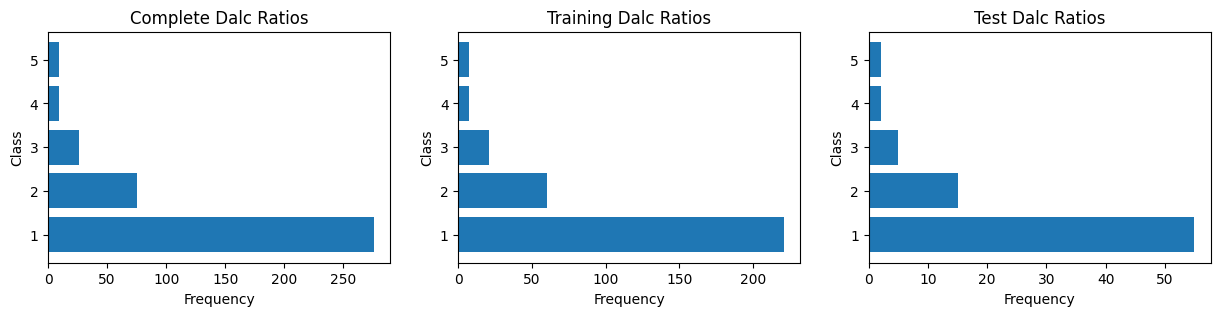

Test Data:	[55 15  5  2  2]


In [323]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Construct a DataFrame that holds the feature names (excluding the label column)
feature_names = data.drop(['Dalc'], axis=1).columns.values
feature_names

# Construct a NumPy array that holds the different classes
class_names = data.Dalc.unique()
class_names

# Split your data into a training set and a test set (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Dalc'], axis=1), data.Dalc, test_size=0.2, random_state=RSEED, stratify=data.Dalc)

fig = plt.figure(figsize=(15,3))
# Complete Data
ax1 = fig.add_subplot(131)
ax1.barh(np.arange(1, 6)[::-1], np.array(data.Dalc.value_counts().sort_values()))
ax1.title.set_text('Complete Dalc Ratios')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Class')
print(f"Complete Data:\t{np.array(data.Dalc.value_counts())}")
# Training Data
ax2 = fig.add_subplot(132)
plt.barh(np.arange(1, 6)[::-1], np.array(y_train.value_counts().sort_values()))
ax2.title.set_text('Training Dalc Ratios')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Class')
print(f"Training Data:\t{np.array(y_train.value_counts())}")
# Test Data
ax3 = fig.add_subplot(133)
plt.barh(np.arange(1, 6)[::-1], np.array(y_test.value_counts().sort_values()))
ax3.title.set_text('Test Dalc Ratios')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Class')
plt.show()
print(f"Test Data:\t{np.array(y_test.value_counts())}")





Despite this class imbalance, you should now train a decision tree classifier on the data as is.
* <div style="color:blue">As in the first part of the ML exercise, please define the feature matrix as <code>X</code> and the target variable as <code>y</code>. </div>
* <div style="color:blue">For model training, implement a <code>DecisionTreeClassifier</code> for which parameters have been tuned using cross-validated grid search.</div>
* <div style="color:blue">The parameters we are interested in are:</div>

    * `max_depth` - using the values: [3, 4]
    * `min_samples_split` - using the values: [2, 3, 4, 5]
    * `min_samples_leaf` - using the values: [2, 3, 4, 5]
* <div style="color:blue">Explicitly set the <code>criterion</code> parameter of your classifier to <code>entropy</code>.</div>
* <div style="color:blue">Don't forget to eventually <b>fit</b> your model, using optimized parameters.</div>

**Note**: This time around, we are not asking to create a separate test set to perform hold-out-validation. As our data is very sparse, and validation is already performed using cross-validation, this should be the right call.

* <div style="color:blue">Print out the parameters for <code>max_depth</code>, <code>min_samples_split</code>, and <code>min_samples_leaf</code> for the best estimator found during grid search.</div>

In [327]:
from sklearn.model_selection import GridSearchCV

# Create a dictionary that holds all values we want to test for the given parameter
parameters = {'max_depth':[3,4], 'min_samples_split':[2,3,4,5], 'min_samples_leaf':[2,3,4,5]}

# Perform grid search (with default score metric)
gs = GridSearchCV(tree.DecisionTreeClassifier(random_state=RSEED, criterion='entropy'), 
                  parameters)
# Fit the model, using optimized parameters
dtree_opt = gs.fit(X_train, y_train)


# Print the optimized parameters
print('Best max_depth:', gs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', gs.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split:', gs.best_estimator_.get_params()['min_samples_split'])



Best max_depth: 3
Best min_samples_leaf: 2
Best min_samples_split: 2


* <div style="color:blue">Get the accuracy score of your decision tree.</div>

**Note**: If you have done everything correctly, your accuracy be around 70% at this point.

In [329]:
from sklearn.model_selection import cross_val_score

# Evaluate the performance of the decision tree using cross validation on the training data
scores = cross_val_score(dtree_opt, X_train, y_train, cv=5)
print(f"Accuracy: {scores.mean()}")

# Evaluate the performance of the decision tree by checking the accuracy score on the test data
dtree_opt.score(X_test, y_test)

Accuracy: 0.6867063492063492


0.6455696202531646

* <div style="color:blue">Display a scikit-learn <code>classification_report</code> of the best estimator on the whole dataset. How are the different classes represented?</div>

**Note:** You can use the `print()` function to properly display the matrix inside a jupyter notebook. Also `zero_division=0` could help!

In [338]:
# Your solution goes here:
from sklearn.metrics import classification_report

# Predict using the best estimator on the whole dataset
y_pred = grid_search.best_estimator_.predict(X)

# Display the classification report
report = classification_report(y, y_pred, zero_division=0)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       208
         1.0       0.80      0.60      0.69       187

    accuracy                           0.74       395
   macro avg       0.76      0.73      0.73       395
weighted avg       0.75      0.74      0.74       395



Now we want to employ another technique to deal with data imbalance and train a more balanced and less biased model. As usual, depending on the data, the use-case, and your personal experience, there are many techniques you could try to implement in order to circumvent or mitigate imbalanced classes. [This website](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/), for example, lists a number of reasonable suggestions to tackle this issue.

In this exercise you should implement an **oversampling** approach. For this, you should install [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) (eg. via `mamba install imbalanced-learn`) and use their [random oversampling class](https://imbalanced-learn.org/stable/over_sampling.html).
* <div style="color:blue">Instantiate a <code>RandomOverSampler</code> from <code>imbalanced-learn</code> and resample your data.</div>
* <div style="color:blue">Make sure that all classes are represented equally!</div>

In [350]:
# Your solution goes here:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Confirm class distribution after resampling
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Class distribution after resampling:
sex
0.0    208
1.0    208
Name: count, dtype: int64


* <div style="color:blue">Now use the same modeling pipeline as before. Implement a <code>DecisionTreeClassifier</code> for which parameters have been tuned using cross-validated grid search. Use the same parameters as before</div>

In [357]:
# use the same grid search to find the best parameters
grid_search_r = GridSearchCV(clf_resampled, param_grid_resampled, cv=5, scoring='accuracy')
grid_search_r.fit(X_resampled, y_resampled)

# Print params
print("Best Parameters:", grid_search_r.best_params_)
print("Best Cross-Validation Score:", grid_search_r.best_score_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.673235800344234


* <div style="color:blue">Finally, display a scikit-learn <code>classification_report</code> of the best estimator on the whole, original dataset.</div>
* <div style="color:blue">How has the classification changed? Please explain why this approach might be favorable for use-cases with rare and sensitive classes (think about <b>rare diseases</b> for example!)</div>


In [359]:
from sklearn.metrics import classification_report

# Generate predictions on the original dataset using the best estimator
y_pred = grid_search_r.best_estimator_.predict(X)

# Display the classification report
print("Classification Report on the original dataset:")
print(classification_report(y, y_pred, zero_division=0))

Classification Report on the original dataset:
              precision    recall  f1-score   support

         0.0       0.69      0.86      0.77       208
         1.0       0.79      0.57      0.66       187

    accuracy                           0.72       395
   macro avg       0.74      0.72      0.71       395
weighted avg       0.74      0.72      0.72       395



##### *although we can see the recall and f1-score are lower than in the first case, we can observe the precision increased after resampling;
##### *the model can become too "confident" and miss some actual cases.